<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop_data=pd.read_csv("../ML/Dataset Processed/crop_production_cleaned.csv")
crop_data

,District_Name,Year,State_Name,Season,Crop,Area,Production,Rainfall,Yield,Temperature
0,Adilabad,2001,Telangana,Rabi,Sunflower,700.0,300.0,103.4,0.428571,24.191500
1,Adilabad,2001,Telangana,Rabi,Urad,700.0,300.0,103.4,0.428571,24.191500
2,Adilabad,2001,Telangana,Rabi,Wheat,2800.0,1600.0,103.4,0.571429,24.191500
3,Adilabad,2001,Telangana,Whole Year,Sugarcane,300.0,28800.0,1322.4,96.000000,27.897667
4,Adilabad,2001,Telangana,Whole Year,Tobacco,200.0,400.0,1322.4,2.000000,27.897667
...,...,...,...,...,...,...,...,...,...,...
164803,Zunheboto,2017,Nagaland,Kharif,Maize,10090.0,19950.0,1056.6,1.977205,22.526667
164804,Zunheboto,2017,Nagaland,Kharif,Mesta,210.0,220.0,1056.6,1.047619,22.526667
164805,Zunheboto,2017,Nagaland,Kharif,Moong(Green Gram),20.0,20.0,1056.6,1.000000,22.526667
164806,Zunheboto,2017,Nagaland,Kharif,Oilseeds total,8170.0,10170.0,1056.6,1.244798,22.526667


In [3]:
crop_data.shape

(164808, 10)

In [4]:
crop_data.columns

Index(['District_Name', 'Year', 'State_Name', 'Season', 'Crop', 'Area',
       'Production', 'Rainfall', 'Yield', 'Temperature'],
      dtype='object')

In [8]:
#find unique crop names
crop_data['Crop'].nunique()

124

In [97]:
crop_data.describe()

,Year,Area,Production,Rainfall,Yield,Temperature
count,164808.000000,1.648080e+05,1.648080e+05,164808.000000,164808.000000,164808.000000
mean,2008.762760,1.263807e+04,2.140375e+05,548.103371,36.260204,25.503341
std,4.722639,3.955953e+04,8.751446e+06,516.775988,832.385199,3.452791
min,2001.000000,5.000000e-01,0.000000e+00,0.000000,0.000000,-0.873750
25%,2005.000000,8.600000e+01,8.600000e+01,123.800000,0.500000,23.158750
50%,2009.000000,6.430000e+02,7.540000e+02,442.500000,1.000000,26.524000
75%,2013.000000,4.947000e+03,7.400000e+03,826.900000,2.285714,28.087877
max,2018.000000,1.020181e+06,1.250800e+09,4878.300000,88000.000000,32.618750


In [98]:
crop_data.isnull().sum()

District_Name    0
Year             0
State_Name       0
Season           0
Crop             0
Area             0
Production       0
Rainfall         0
Yield            0
Temperature      0
dtype: int64

In [99]:
data = crop_data.drop(['State_Name'], axis = 1)

In [100]:
data.corr(numeric_only=True)

,Year,Area,Production,Rainfall,Yield,Temperature
Year,1.000000,-0.004339,0.011605,-0.081892,0.013196,-0.002478
Area,-0.004339,1.000000,0.022484,-0.094853,-0.007417,-0.052841
Production,0.011605,0.022484,1.000000,0.024372,0.316388,0.023721
Rainfall,-0.081892,-0.094853,0.024372,1.000000,0.060400,0.411663
Yield,0.013196,-0.007417,0.316388,0.060400,1.000000,0.034362
Temperature,-0.002478,-0.052841,0.023721,0.411663,0.034362,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

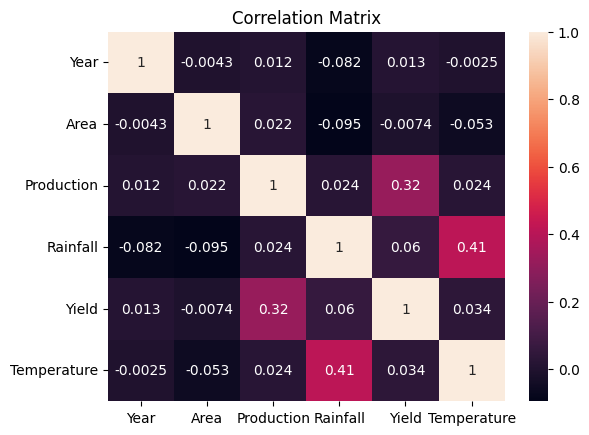

In [101]:
sns.heatmap(data.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

In [102]:
dummy = pd.get_dummies(data)
dummy


,Year,Area,Production,Rainfall,Yield,Temperature,District_Name_Adilabad,District_Name_Agra,District_Name_Ahmadabad,District_Name_Ajmer,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2001,700.0,300.0,103.4,0.428571,24.191500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,700.0,300.0,103.4,0.428571,24.191500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2001,2800.0,1600.0,103.4,0.571429,24.191500,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2001,300.0,28800.0,1322.4,96.000000,27.897667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,200.0,400.0,1322.4,2.000000,27.897667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164803,2017,10090.0,19950.0,1056.6,1.977205,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164804,2017,210.0,220.0,1056.6,1.047619,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164805,2017,20.0,20.0,1056.6,1.000000,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164806,2017,8170.0,10170.0,1056.6,1.244798,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
#remove district_name from dummy columns name
dummy.columns = dummy.columns.str.replace('District_Name_', '')
dummy.columns=dummy.columns.str.replace('Crop_', '')
dummy.columns=dummy.columns.str.replace('Season_', '')

<b><i> Splitting dataset into train and test dataset </i></b>

In [105]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (123606, 537)
x_test : (41202, 537)
y_train : (123606,)
y_test : (41202,)


In [130]:
import json
cols = x.columns
with open('columns.json', 'w') as f:
    json.dump(cols.tolist(), f)


In [106]:
print(x_train.head())
print(y_train.head())

        Year     Area  Rainfall  Temperature  Adilabad  Agra  Ahmadabad  \
135357  2010     36.0     147.2     25.72200         0     0          0   
82200   2012    117.0     355.7     29.13125         0     0          0   
52623   2013  21503.0     301.2     27.60900         0     0          0   
51564   2005    428.0     123.8     30.24125         0     0          0   
91658   2008    670.0     327.2     24.58175         0     0          0   

        Ajmer  Akola  Aligarh  ...  Turmeric  Turnip  Urad  Varagu  \
135357      0      0        0  ...         0       0     0       0   
82200       0      0        0  ...         0       0     0       0   
52623       0      0        0  ...         0       0     0       0   
51564       0      0        0  ...         0       0     0       0   
91658       0      0        0  ...         0       0     1       0   

        Water Melon  Wheat  Yam  other fibres  other misc. pulses  \
135357            0      0    0             0              

<b><h3> Linear Regression </b></h3>

In [107]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [108]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([  28168.51171875,  307049.68554688,  -93118.52539062, ...,
        -78694.88476562,  -47256.96484375, -230251.75585938])

In [109]:
model.score(x_test,y_test)

0.0523219756049389

In [110]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.0523219756049389


Text(0.5, 1.0, 'Linear Regression')

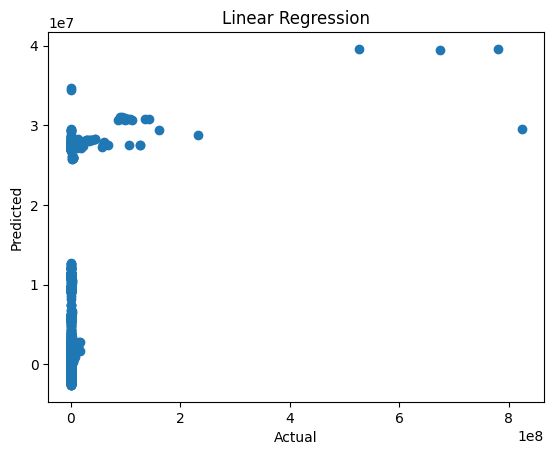

In [111]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.


<b><h3> Random Forest Algorithm </h3></b>

In [112]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11,random_state=1)
model.fit(x_train,y_train)
rf_predict_train = model.predict(x_train)
rf_predict = model.predict(x_test)
rf_predict

array([41972.36363636,   473.78181818,    80.90909091, ...,
        4856.63636364,   927.48181818, 22088.90909091])

In [113]:
model.score(x_test, y_test)

0.8740888545063199

In [114]:
import pickle
pickle.dump(model,open('../backend/Models/Yield.pkl','wb'))

In [115]:
model.predict(x)

array([ 391.81818182,  286.72727273, 2710.63636364, ...,   19.09090909,
       8178.45454545,  141.90909091])

In [116]:
from sklearn.metrics import r2_score
r1 = r2_score(y_train,rf_predict_train)
print("R2 score : ",r1)

R2 score :  0.9557304489900449


In [117]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.8740888545063199


In [118]:
Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8724260991175213


<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b> 



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

<b> Support Vector Regression </b> 

In [119]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([44532.,   737.,    57., ...,  6437.,  1429., 16033.])

In [120]:
regressor.score(x_test,y_test)

0.9441493805662039

In [121]:
# Calculating R2 score :
from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9441493805662039


In [122]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.039807144326654775


In [123]:
import pickle
pickle.dump(regressor,open('../backend/Models/DecisionTree.pkl','wb'))

Text(0.5, 1.0, 'R2 Score of Random Forest and Decision Tree')

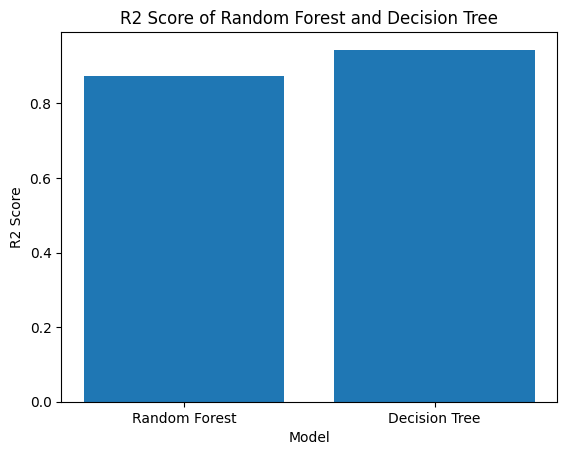

In [125]:
#plot the r2 score of random forest and decision tree
plt.bar(['Random Forest','Decision Tree'],[r1,r2])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score of Random Forest and Decision Tree')    

Text(0.5, 1.0, 'Mean Squared Error of Random Forest and Decision Tree')

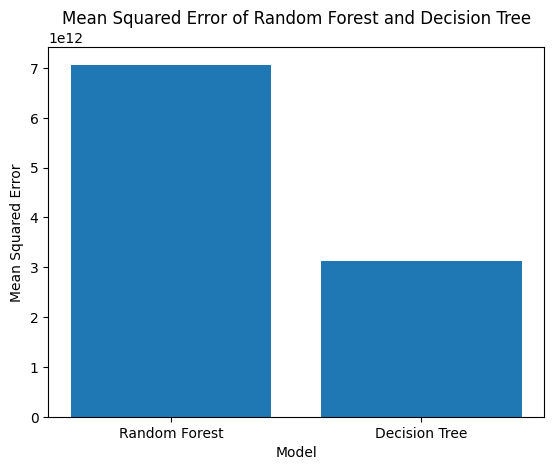

In [126]:
#plot mean squared error of random forest and decision tree
from sklearn.metrics import mean_squared_error
plt.bar(['Random Forest','Decision Tree'],[mean_squared_error(y_test,rf_predict),mean_squared_error(y_test,decisiontree_predict)])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Random Forest and Decision Tree')

Text(0.5, 1.0, 'Mean Absolute Error of Random Forest and Decision Tree')

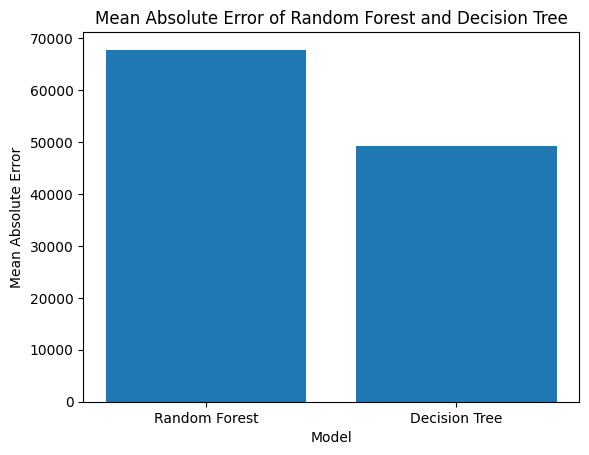

In [127]:
#plot mean absolute error of random forest and decision tree
from sklearn.metrics import mean_absolute_error
plt.bar(['Random Forest','Decision Tree'],[mean_absolute_error(y_test,rf_predict),mean_absolute_error(y_test,decisiontree_predict)])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Random Forest and Decision Tree')